# Brazil Medical Appointment Dataset Exploration
## by Arikewuyo, Mojeed Adeleke

## Introduction
>This Cleaned Medical Appointment Data is based on information from over a hundred thousand (100,000) medical appointments in Brazil and is focused on determining whether or not patients show up for their appointment. Specific details and characteristics are included for each patient, under different headers or columns. These columns are:

>● 01 - PatientId - Identification of a patient

>● 02 - Gender - Male or Female.

>● 03 - ScheduledDay - The day the patient booked or set up the appointment.

>● 04 - AppointmentDay - The day of the actual appointment, when they have to visit the doctor.
   
>● 05 - Age - The age of the patient.
  
>● 06 - Neighbourhood - this is the location of the hospital.
   
>● 07 - Scholarship - True or False. True means that they took part in the Brasilian welfare program Bolsa Família; False means that they did not take part in the Brasilian welfare program Bolsa Família. View added information [here]('https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia').

>● 08 - SMS_received - Yes or No. Yes means the patient received SMS; No means the patient did not receive any SMS.

>● 09 - Appointment - Present or Absent. Present means that they showed up for the appointment and Absent means that they did not show up for the appointment.

>● 10 - Ailment - This refers to the kind of ailment the patients booked appointments for (Hypertension, Diabetes, Alcoholism, Handicap; there are also cases where patients state more than one ailment for an appointment, as well as cases where no ailment was stated while booking the appointment).




## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

> First, I load in my dataset and describe its properties through the questions below.


In [2]:
medicals = pd.read_csv('brazil_noshowappointments_cleaned_may2016.csv')
medicals.head()

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,sms_received,appointment,ailment
0,2.987250e+13,F,2016-04-29 18:38:08,2016-04-29 00:00:00,62.0,JARDIM DA PENHA,False,No,Present,hypertension
1,5.589978e+14,M,2016-04-29 16:08:27,2016-04-29 00:00:00,56.0,JARDIM DA PENHA,False,No,Present,None
2,4.262962e+12,F,2016-04-29 16:19:04,2016-04-29 00:00:00,62.0,MATA DA PRAIA,False,No,Present,None
3,8.679512e+11,F,2016-04-29 17:29:31,2016-04-29 00:00:00,8.0,PONTAL DE CAMBURI,False,No,Present,None
4,8.841186e+12,F,2016-04-29 16:07:23,2016-04-29 00:00:00,56.0,JARDIM DA PENHA,False,No,Present,hypertension/diabetes


In [3]:
medicals.sample(10)

,patientid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,sms_received,appointment,ailment
20517,2.713233e+14,F,2016-05-02 07:05:34,2016-05-10 00:00:00,21.0,JARDIM DA PENHA,False,Yes,Absent,None
17690,7.889322e+13,F,2016-05-24 07:41:30,2016-05-30 00:00:00,59.0,MONTE BELO,False,Yes,Absent,None
3493,8.645955e+14,F,2016-05-12 13:52:59,2016-05-12 00:00:00,31.0,RESISTÊNCIA,False,No,Present,None
8253,2.555184e+13,F,2016-05-17 07:17:27,2016-05-19 00:00:00,70.0,SANTA TEREZA,False,No,Present,hypertension
17677,9.274696e+11,F,2016-05-05 06:59:58,2016-05-09 00:00:00,52.0,BONFIM,False,No,Present,hypertension
18356,9.746669e+11,F,2016-05-09 13:45:39,2016-05-09 00:00:00,52.0,MARIA ORTIZ,False,No,Present,None
104651,2.373482e+13,F,2016-05-06 13:58:14,2016-06-02 00:00:00,23.0,ANDORINHAS,False,Yes,Absent,None
55586,4.275859e+13,M,2016-05-13 17:47:57,2016-05-31 00:00:00,8.0,REDENÇÃO,False,Yes,Present,None
16859,4.765612e+13,F,2016-05-31 07:33:32,2016-05-31 00:00:00,37.0,RESISTÊNCIA,True,No,Present,None
59353,1.896143e+10,F,2016-05-20 14:05:43,2016-05-20 00:00:00,53.0,REDENÇÃO,False,No,Present,handicap


In [4]:
# to check the overview of the dataframe's shape and datatypes.
print(medicals.shape)
print(medicals.dtypes)

(109909, 10)
patientid         float64
gender             object
scheduledday       object
appointmentday     object
age               float64
neighbourhood      object
scholarship          bool
sms_received       object
appointment        object
ailment            object
dtype: object


In [5]:
#changing the datatypes for patientid into string; the scheduledday and appointmentday columns into datetime; gender, sms_received and appointment into category datatype
medicals['patientid'] = medicals['patientid'].astype('str')
medicals['scheduledday'] = pd.to_datetime(medicals['scheduledday'])
medicals['appointmentday'] = pd.to_datetime(medicals['appointmentday'])
medicals['gender'] = medicals['gender'].astype('category')
medicals['sms_received'] = medicals['sms_received'].astype('category')
medicals['appointment'] = medicals['appointment'].astype('category')

In [6]:
print(medicals.dtypes)
medicals.describe()

patientid                 object
gender                  category
scheduledday      datetime64[ns]
appointmentday    datetime64[ns]
age                      float64
neighbourhood             object
scholarship                 bool
sms_received            category
appointment             category
ailment                   object
dtype: object


,age
count,109909.000000
mean,38.278019
std,22.113239
min,1.000000
25%,20.000000
50%,37.088874
75%,55.000000
max,115.000000


### Structure of Dataset

> There are 109909 appointments, with 10 columns identifying specific characterisitics of the patients that booked the appointments (patientid, gender,	scheduledday, appointmentday, age, neighbourhood, scholarship, sms_received, appointment and ailment). Most of the variables are Qualitative in nature, with the exception of the age variable that is numeric and forms the central core information about the patient.

### Main Feature(s) of Interest in Dataset

> The focus is to determine whether or not patients show up for their appointment. To acheive this, I will be performing explorations into various relationships between the unique characteristics of the patients and them keeping or missing their appointments.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> It is expected that the age of the patient will play a pivotal role on if the medical appointments are kept or missed. However, the effects of gender, location of the hospital and welfare scholarship cannot be overemphasized. I also believe the receipt of a SMS reminder would play an important role, although not as much as the other features.


## Univariate Exploration

> In this section, there would be sufficient investigations into the distributions of individual variables.


In [7]:
# create general function for bar chart. this bar chart function will serve for some of the bar chart within the
# univariate exploration section,
def univ_bar(x, labels):
    base_color = sns.color_palette()[0]
    bar_order= x.value_counts().index
    sns.countplot(x, color=base_color, order=bar_order)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])

### What is the population disparity for patients who kept or missed their appointments?
First, I explore the main variable of interest: `appointment`

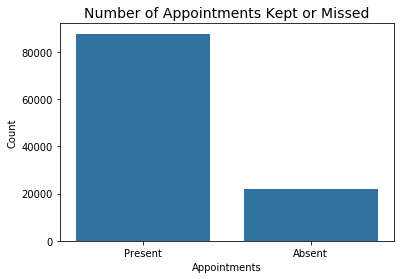

In [8]:
# plot a barchart of the appointment column.
x = medicals['appointment']
labels = ['Appointments', 'Count']
univ_bar(x, labels)
plt.title('Number of Appointments Kept or Missed', fontsize=14);

● There are more patients present for their appointment, with over 80,000 appointments kept. This is in stark contrast to the Absent appointments, with a little over 20,000 missing their appointment day.

> Next, I begin exploration into some of the predictor variables of interest that can aid our analysis on the patient's appointment: `age`, `gender`, `scholarship` and `sms_received`.

### Which patient age happen to occur the most?

In [9]:
medicals['age'].max()

115.0

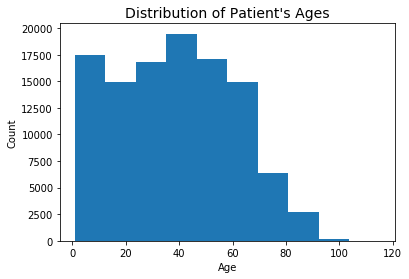

In [10]:
#plot a standard histogram of the age column.
plt.hist(data = medicals, x = 'age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Distribution of Patient's Ages", fontsize=14);

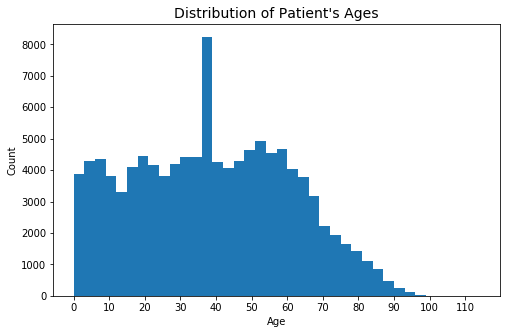

In [11]:
#fine tune the histogram to further spread the bars and pick out the truly distinct values.
bins = np.arange(0, medicals['age'].max()+1, 3)
plt.figure(figsize=[8, 5])
plt.hist(data = medicals, x = 'age', bins = bins)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title("Distribution of Patient's Ages", fontsize=14)
plt.xticks(np.arange(0,110+5,10))
plt.show()

● The age distribution is clearly unimodal, with the modal age falling between the ages 30 and 40, and a steady decline in the number of patients booking appointments from age 70 above.

### Which gender made the most appointments?

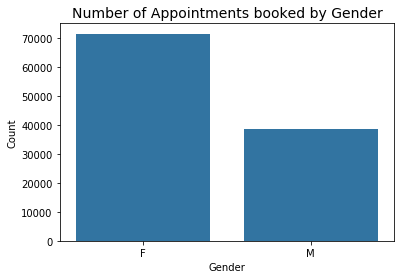

In [12]:
# plot a barchart of the gender column.
x = medicals['gender']
labels = ['Gender', 'Count']
univ_bar(x, labels)
plt.title('Number of Appointments booked by Gender', fontsize=14);

● More female patients booked medical appointments than their male counterpart, with over 70,000 female appointments as against a little under 40,000 appoints for males.

### What effect does Welfare Scholarship have on the booking of medical appointments?

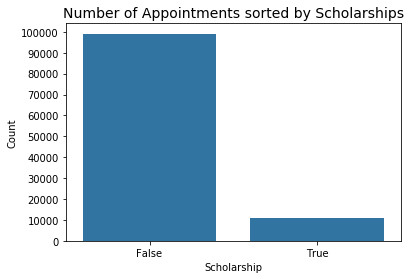

In [13]:
# plot a barchart of the scholarship column.
x = medicals['scholarship']
labels = ['Scholarship', 'Count']
univ_bar(x, labels)
plt.title('Number of Appointments sorted by Scholarships', fontsize=14);
plt.yticks(np.arange(0,100000+1000,10000));

● The Bolsa Familia Welfare program does not hold substantial effect on medical appointments, as well over 90,000 appointments are booked by patients that are not part of the welfare program.

### What effect does the SMS received have on the booking of medical appointments?

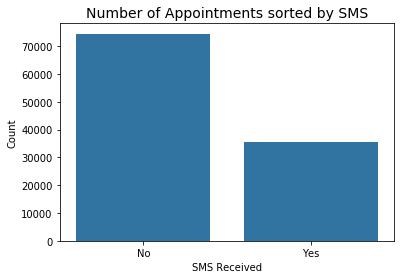

In [14]:
# plot a barchart of the sms_received column.
x = medicals['sms_received']
labels = ['SMS Received', 'Count']
univ_bar(x, labels)
plt.title('Number of Appointments sorted by SMS', fontsize=14);

● This shows that majority of the appointments ended up not receiving a message from the hospital after scheduling the appointment, with over 70,000 appointments not receiving any follow-up SMS.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The Appointment variable showcases a large, unique feature, as mor appointments are kept, as against those missed. Further, the investigation shows that most of the patients fall below the age of 60, though further analysis pinpoints that the modal age actually falls around the 40-year mark. Most of the patients did not receive SMS from the hospital, and a larger majority are not registered under the Bolsa Familia Welfare Program. It will be interesting to determine if the neighnourhood that contains the hospitals play a needful part in the appointment keeping process, as well as if there are factor that warranted the low number of patients that were recipients of the welfare program.


## Bivariate Exploration

> In this section, there will be sufficient investigation into relationships between pairs of variables in the
data.

### What is the relationship between the ages of the patients and their appointments?

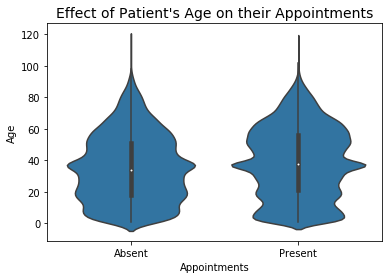

In [15]:
# analyse the appointments with respect to the ages of the patients.
base_color = sns.color_palette()[0]
sns.violinplot(data=medicals, x='appointment', y='age', color=base_color)
plt.xlabel('Appointments')
plt.ylabel('Age')
plt.title("Effect of Patient's Age on their Appointments", fontsize=14);

The Violin Plot shows that there are much more appointments booked by patients who are 60 years or younger. it is also inferrable that patients that are older than 40 years tend to keep more of their appointments, as against those younger than 40 years. With the average age of patients around the 40 year mark, most of the appointments come from patients between 20 to 60 years of age.

### What is the relationship between the gender of the patients and their appointments?

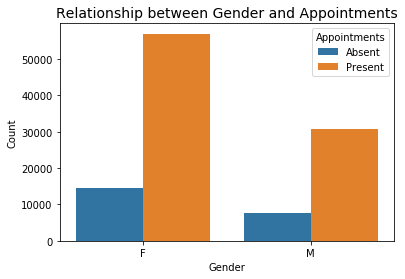

In [16]:
# analyse the appointments with respect to the gender of the patients.
sns.countplot(data=medicals, x='gender', hue='appointment')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Appointments')
plt.title('Relationship between Gender and Appointments', fontsize=14);

We see from the chart above that the female gender shows the most distant disparity in appointments, compared to male. Overall, both gender kept more appointments than they missed, with the females particularly keeping a largely substantial portion of theirs.

### Is the neighbourhood associated with the appointment?

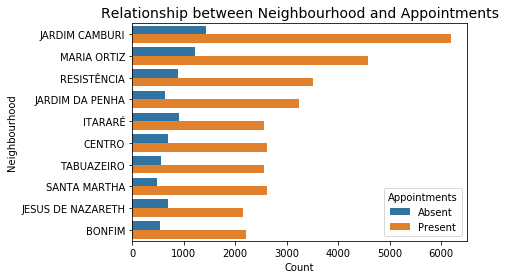

In [17]:
# analyse the appointments with respect to the neighbourhood.
sns.countplot(data=medicals, y='neighbourhood', hue='appointment', order=medicals.neighbourhood.value_counts().iloc[:10].index)
plt.xlabel('Count')
plt.ylabel('Neighbourhood')
plt.legend(title='Appointments')
plt.title('Relationship between Neighbourhood and Appointments', fontsize=14);

From the Chart above, we can infer that the patients in each of the top 10 neighbourhood generally show up for their appointments more times than they miss, with each of those neghbourhoods having more completed appointments than missed appointments.

### Do patients tend to miss their appointment when they don't receive reminders from the hospital?

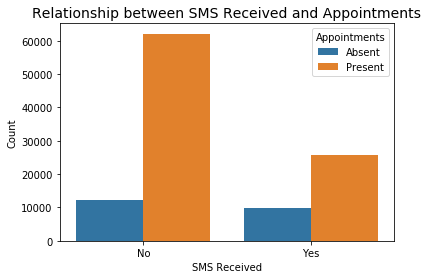

In [18]:
# analyse the appointments with respect to the sms received by the patients from the hosptial.
sns.countplot(data=medicals, x='sms_received', hue='appointment')
plt.xlabel('SMS Received')
plt.ylabel('Count')
plt.legend(title='Appointments')
plt.title('Relationship between SMS Received and Appointments', fontsize=14);

Thus, we see that most of the appointments from the patients who didn't receive SMS were kept. This indicates hugely that the patients do not tend to miss their appointments even when they don't receive SMS from the hospital.

### Are patients liable to miss their appointments if they are not part of the welfare program (Bolsa Familia Scholarship?

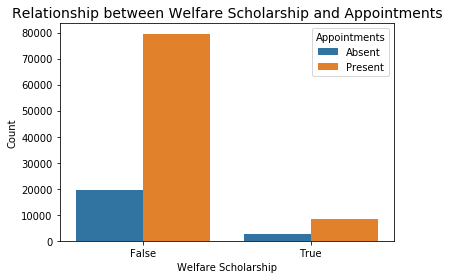

In [19]:
# analyse the appointments with respect to the welfare scholarship received by the patients.
sns.countplot(data=medicals, x='scholarship', hue='appointment')
plt.xlabel('Welfare Scholarship')
plt.ylabel('Count')
plt.legend(title='Appointments')
plt.title('Relationship between Welfare Scholarship and Appointments', fontsize=14);

Overall, we can infer that the appointments of patients that are not part of the welfare program are more than those of patients that are part of the program. In fact, a huge majority of the appointments for patients who were not part of the welfare program were still kept, as against a lesser amount of appointments that were missed. Thus, the patients are not liable to miss their appointments even when not they are not part of the Bolsa Familia Welfare Program. This leads us to wonder if the participation in the welfare program is influenced by other factors, like age, and if patients that scheduled appointments followed a trench with respect to their age and the welfare program.

### Does Age bear a significant factor on the participation of patients in the Welfare Program?

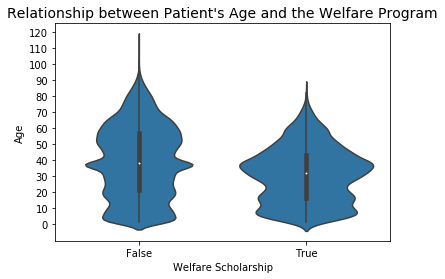

In [20]:
# analyse the distribution of patients that were or were not part of the welfare scholarship program.
base_color = sns.color_palette()[0]
sns.violinplot(data=medicals, x='scholarship', y='age', color=base_color)
plt.xlabel('Welfare Scholarship')
plt.ylabel('Age')
plt.yticks(np.arange(0,120+1,10))
plt.title("Relationship between Patient's Age and the Welfare Program", fontsize=14);

From the analysis, it becomes clear that a vast portion of patients that scheduled appointments and were part of the welfare scholarship were between the ages of 10 and 40. In fact, the older patients from 50 years upward tended not to be part of the welfare program, with a large amount of appointments coming from patients around the 60-year mark being those not part of the program.

### Does the Patient's Scholarship Status affect their receipt of SMS from the Hospital?

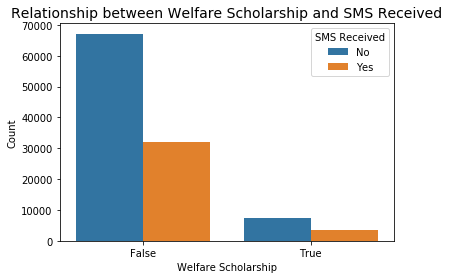

In [21]:
# analyse the appointments with respect to the welfare scholarship received by the patients.
sns.countplot(data=medicals, x='scholarship', hue='sms_received')
plt.xlabel('Welfare Scholarship')
plt.ylabel('Count')
plt.legend(title='SMS Received')
plt.title('Relationship between Welfare Scholarship and SMS Received', fontsize=14);

Overall, patients who were not part of the scholarship program received the bulk of the messages from the Hospital. However, there were a lot more patients that did not receive SMS, regardless of whether they were part of the scholarship program or not. Further investigation can be do to see if patients in or out of the scholarship were present for their appointments, with respect to the message they received.

### Is there a relationship between the patient's schedule day and their appointment day?)

In [22]:
# create function for bar chart with percentages. this bar chart function will serve for the bar charts within this
# section that carry percentages,
def plot_bar_percent(y, ticks, labels):
    x = list(np.arange(len(y)))
    plt.bar(x, y, tick_label = ticks)
    plt.xlabel(labels[0])
    plt.ylabel(labels[1])
    for xx,yy in zip(x,y):
        plt.text(xx, yy-20, str(yy)+'%', va='center', ha='center', color='white', weight='bold');

In [23]:
# to query the number of appointments where the scheduled day and the appointment day were same,
same_day = medicals[medicals['scheduledday'].dt.date == medicals['appointmentday'].dt.date]
same_day['patientid'].count()

38495

In [24]:
# to query the number of appointments where the scheduled day and the appointment day were different,
diff_day = medicals[medicals['scheduledday'].dt.date != medicals['appointmentday'].dt.date]
diff_day['patientid'].count()

71414

In [25]:
# to deduce if patients, who had their scheduled day the same day as their appointment day, kept or missed their appointments,
same_day_prop = same_day['appointment'].value_counts(normalize=True)
same_day_prop

Present    0.953682
Absent     0.046318
Name: appointment, dtype: float64

In [26]:
# to deduce if patients, who had their scheduled day on a different day to their appointment day, kept or missed their appointments,
diff_day_prop = diff_day['appointment'].value_counts(normalize=True)
diff_day_prop

Present    0.715434
Absent     0.284566
Name: appointment, dtype: float64

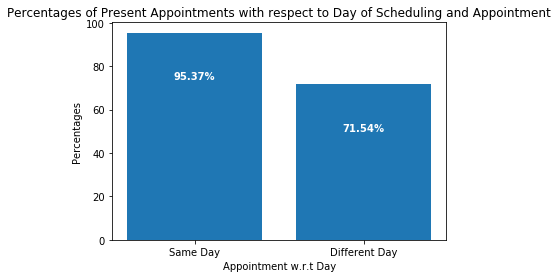

In [27]:
# to plot a clustered bar chart showing the spread of present appointments, with respect to the day of appointment,
same_day_percentage = (same_day_prop[1]*100).round(2)
diff_day_percentage = (diff_day_prop[1]*100).round(2)
y = [same_day_percentage, diff_day_percentage]
ticks = ['Same Day', 'Different Day']
labels = ['Appointment w.r.t Day','Percentages']
plot_bar_percent(y, ticks, labels)
plt.title('Percentages of Present Appointments with respect to Day of Scheduling and Appointment');

From the information above, we see that 95.37% of the appointments for patients who had the same scheduled and appointment day were kept, as against 71.54% from those who their appointment on a different day from the day they scheduled. This indicates hugely that patients who had their appointments on the same day as their scheduled day were more committed to keeping their appointments than those who had their appointments on a different day.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Indeed, older patients tend to keep to their appointments more than their young counterparts. This is not to undermine the fact that there are generally much more younger patients scheduling appointments generally. My analysis also shows that there are more female patients scheduling appointments, and that they are diligent enough to still keep a majority of them, despite the high number of appointment generated. Overall, patients in different locations kept more appointments than they missed, and were not liable to miss appointments even if they did not receive a SMS, or were not registered under the Welfare Program.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Further investigation shows that younger patients were more liable to being in the Bolsa Familia Welfare Program, and a large bulk of them came in between the ages of 10 and 40, with patients above 50 mostly not recipients of the welfare scholarship. More appointments were kept in situations where the patients were assigned an appointment on the same day they scheduled or booked the appointment, with a reduced present rate when the patients were booked for a separate day.

## Multivariate Exploration

> In this section, there will be sufficient investigation into relationships between more than two variables in the
data.

### Is there a relationship between the Patient's Age, their Scholarship Status and their appointments?

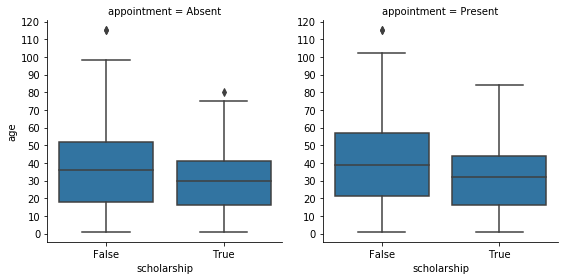

In [28]:
# explore the relationship between age, scholarship and appointment columns.
g = sns.FacetGrid(data = medicals, col = 'appointment', size = 4)
g.map(sns.boxplot, 'scholarship', 'age')
plt.yticks(np.arange(0,120+1,10));

This analysis further strengthens the fact that older patients beyond the age of 40 that booked medical appointments, were mostly not under the welfare scholarship program. With a median age around the 30-year mark, younger patients tend to be a part of the scholarship, and are liable to keep to their appointment more times than they miss. These facts can be further explicated with more visualisations

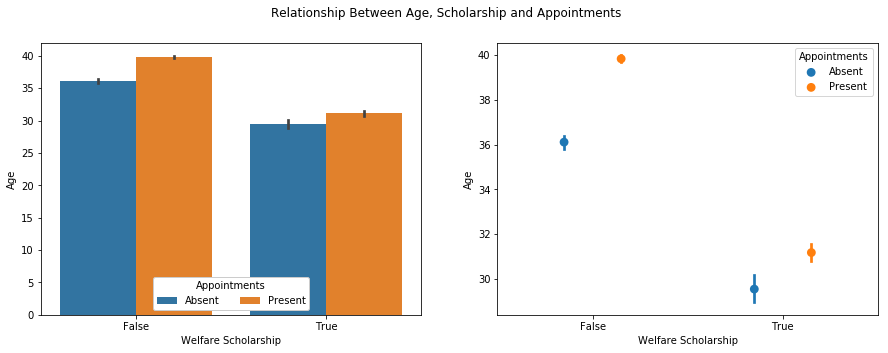

In [29]:
# expressing the relationship using a barplot, to explicitly display estimations of central tendencies.
plt.figure(figsize=[15,5]) # set figure
plt.suptitle('Relationship Between Age, Scholarship and Appointments')
             
plt.subplot(1,2,1) #split figure and specify first subplot
ax = sns.barplot(data = medicals, x = 'scholarship', y = 'age', hue = 'appointment')
ax.legend(loc = 8, ncol = 3, framealpha = 1, title = 'Appointments')
plt.xlabel('Welfare Scholarship')
plt.ylabel('Age')

plt.subplot(1,2,2) #specify seconf subplot
ax = sns.pointplot(data = medicals, x = 'scholarship', y = 'age', hue = 'appointment',dodge = 0.3, linestyles = "")
plt.xlabel('Welfare Scholarship')
plt.ylabel('Age')
plt.legend(title='Appointments');

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

My investigation into the appointments were extended by delving deeper into analysis of some of the central characteristics of the patient, simply the age, the scholarship status, and the booked appointments. The multivariate exploration here showed that age played a significant role in determining the range of patients that booked apppointments, as well as the significance of the welfare program status. The median ages also further strengthen the attachment of younger patients towards the scholarship, as well as the liability of older patients to not be part of the program.

### Were there any interesting or surprising interactions between features?

From the point plot, we see that the central ages are not much far apart, and represent the respectable range for young patients. While this might be unrelated, it is in fact interesting to note that the central age for patients with scholarships still fall just below the 30-year mark, as further proof of the fact that the patients that booked appointments and were part of Bolsa Familia Program are young patients or youths.

### Conclusion
The research work sought to analyse the Medical Appointment Data, based on information gotten from a hundred thousand medical appointments in Brazil. The focus was to determine whether or not patients showed up for their appointment. To acheive this, a total of seven research questions were explored and analysed, after rigourous cleanliness of the dataset.

The research work was analysed within the clear bounds of the exploratory analysis tools including the Histogram, Bar Chart, Violin Plots, Box PLots and the Clustered Bar Chart. There was no further explorations through Inferential methods of hypothesis and tests, as the findings of this research work was realised independently from the dataset available, and without any interaction with the patients through means of survey, questionnaires or otherwise. Thus, the findings of this research are to be considered viable based on the data available through the data set, and not based on ever evolving parameters that would arise from an interaction with the patients, the hospital staffs, the welfare program coordinators, etc.

Overall, the data visualizations have displayed the importance of the predictor variables on the viability of Appointments, as it showed clear guidepoints as to why patients keep or miss their appointments.